In [3]:
from segment_anything import SamPredictor, sam_model_registry
sam = sam_model_registry["default"](checkpoint="sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)

import cv2
import numpy as np

# Read the image from the file location
image_path = "C:/Users/53344/Downloads/Screenshot 2025-01-30 143951.png"
image = cv2.imread(filename=image_path)

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2RGB)

# Convert the image to a numpy array
image_array = np.array(object=image_rgb)

# Set the image for the predictor
predictor.set_image(image=image_array)


masks, _, _ = predictor.predict("Bounding boxes around text")



In [6]:
import cv2
# from doclayout_yolo import YOLOv10
# from huggingface_hub import hf_hub_download
import torch

# filepath = hf_hub_download(repo_id="juliozhao/DocLayout-YOLO-DocStructBench", filename="doclayout_yolo_docstructbench_imgsz1024.pt")
model = torch.load(f="doclayout_yolo_docstructbench_imgsz1024.pt", weights_only=False, map_location=torch.device('cpu'))
import torch
from torchvision import transforms

# Extract the actual model from the checkpoint dictionary if needed
if isinstance(model, dict) and ("model" in model):
    model_nn = model["model"]
else:
    model_nn = model

# Set the model to evaluation mode
model_nn.eval()

# Define a preprocessing pipeline:
preprocess = transforms.Compose([
    transforms.ToPILImage(),                      # Convert a NumPy array to a PIL Image
    transforms.Resize(size=(1024, 1024)),         # Resize image to 1024x1024 (adjust if necessary)
    transforms.ToTensor()                         # Convert image to tensor and scale pixel values to [0, 1]
    # Optionally, add normalization if required by your model, e.g.:
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

input_image_path = "C:/Users/53344/Downloads/Screenshot 2025-01-30 143951.png"
# Read image using OpenCV (BGR format)
img_bgr = cv2.imread(filename=input_image_path)
if img_bgr is None:
    print("Error: Unable to load image from", input_image_path)
else:
    # Convert the image from BGR to RGB
    img_rgb = cv2.cvtColor(src=img_bgr, code=cv2.COLOR_BGR2RGB)
    
    # Preprocess the image to obtain a tensor
    input_tensor = preprocess(img_rgb)
    # Add a batch dimension so the shape becomes (1, C, H, W)
    input_tensor = input_tensor.unsqueeze(dim=0)
    
    with torch.no_grad():
        # Run a forward pass through the model using the torch library
        outputs = model_nn(input_tensor=input_tensor)
    
    print("Model Outputs:", outputs)


# model = YOLOv10(model=loaded_weights)

import torch.nn.functional as F
from PIL import Image

img_transforms = transforms.Compose([
    transforms.Resize((64,64)),    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225] )
    ])

device = torch.device("cpu")
img = Image.open("C:/Users/53344/Downloads/Screenshot 2025-01-30 143951.png").convert('RGB')
img = img_transforms(img).to(device)
img = torch.unsqueeze(img, 0)
prediction = F.softmax(input=model_nn(x=img.float()).float(), dim=1)

AssertionError: point_labels must be supplied if point_coords is supplied.


image 1/1 C:\Users\53344\Downloads\Screenshot 2025-02-04 165449.png: 1024x800 1 title, 4 plain texts, 4 abandons, 2 figures, 2 figure_captions, 2 tables, 2635.0ms
Speed: 8.9ms preprocess, 2635.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 800)



image 1/1 C:\Users\53344\Downloads\Screenshot 2025-02-04 165449.png: 1024x800 1 title, 4 plain texts, 4 abandons, 2 figures, 2 figure_captions, 2 tables, 1765.4ms
Speed: 7.0ms preprocess, 1765.4ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 800)


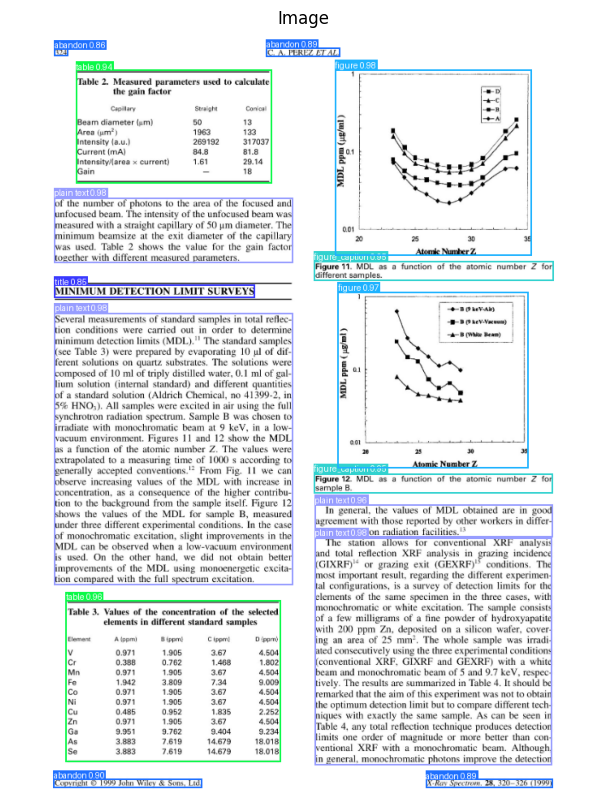

In [26]:
det_res[0].names

{0: 'title',
 1: 'plain text',
 2: 'abandon',
 3: 'figure',
 4: 'figure_caption',
 5: 'table',
 6: 'table_caption',
 7: 'table_footnote',
 8: 'isolate_formula',
 9: 'formula_caption'}

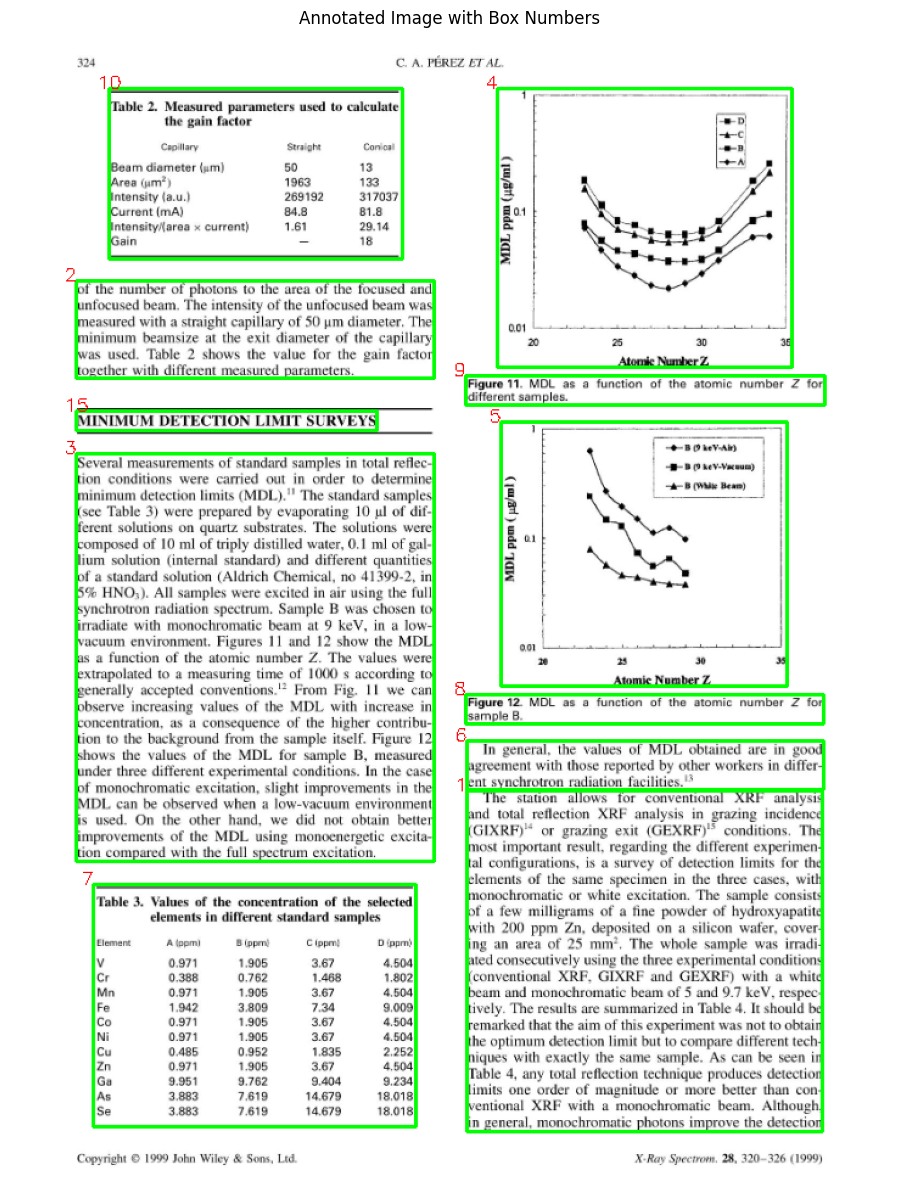

In [31]:
# Overlay the bounding boxes on the original image and annotate each with a number



In [ ]:

# Annotate and save the result
annotated_frame = det_res[0].plot(pil=True, line_width=5, font_size=20)
cv2.imwrite("result.jpg", annotated_frame)

In [8]:
import detectron2.utils.comm as comm

ModuleNotFoundError: No module named 'detectron2'